## Introduction

Diabetes is a common, chronic health condition that affects how your body turns food into energy. The disease or condition which is continual or whose effects are permanent is a chronic health condition. These types of diseases affected quality of life, which is major adverse effect. Diabetes is one of the most acute diseases, and is present worldwide. A major reason of deaths in adults across the globe includes this chronic condition. Chronic conditions are also cost associated. A major portion of budget is spent on chronic diseases by governments and individuals.

As of 2019, an estimated 463 million people had diabetes worldwide (8.8% of the adult population), with type 2 diabetes making up about 90% of the cases. Rates are similar in women and men. Trends suggest that rates will continue to rise. Diabetes at least doubles a person's risk of early death.In 2019, diabetes resulted in approximately 4.2 million deaths. 
It is the 7th leading cause of death globally. (Source: Wikipedia)

Prediction of diabetes at an early stage can lead to improved treatment but diagnosis of diabetes is considered a challenging problem for quantitative research. Data mining techniques are widely used for prediction of disease at an early stage. 

Data source: Kaggle. The dataset used for this study is 'Pima Indians Diabetes Database'. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. In particular, all patients here are females at least 21 years old. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../joshm/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

DATATYPES: In the dataset, out of 9 attributes , 7 have the integer datatype (values are whole numbers so can be either positive, negative or zero. Whereas the other two of the attributes are floats or the floating point datatype because it includes a fraction represented in decimal format.

In [4]:
df.shape

(768, 9)

ROWS AND COLUMNS: The dataset has 768 observations(rows) and 9 attributes (columns)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

ATTRIBUTES/VARIABLES: The datasets consist of 8 predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, glucose level, insulin level, Age, Blood Pressure, skin thickness and Diabetes Pedigree Function.

### Missing Values

In [6]:
missing = df.isnull().sum()
missing

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It was observed that the dataset has no missing values.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Observations

There are a total of 768 records and 9 attributes/features in the above dataset.
Each feature belong to either of the two datatypes: integer or float
Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
There are zero NaN values in the dataset.
In the outcome column, 1 represents diabetes result is positive and 0 represents diabetes result is negative.


### EXPLORATORY DATA ANALYSIS/ DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

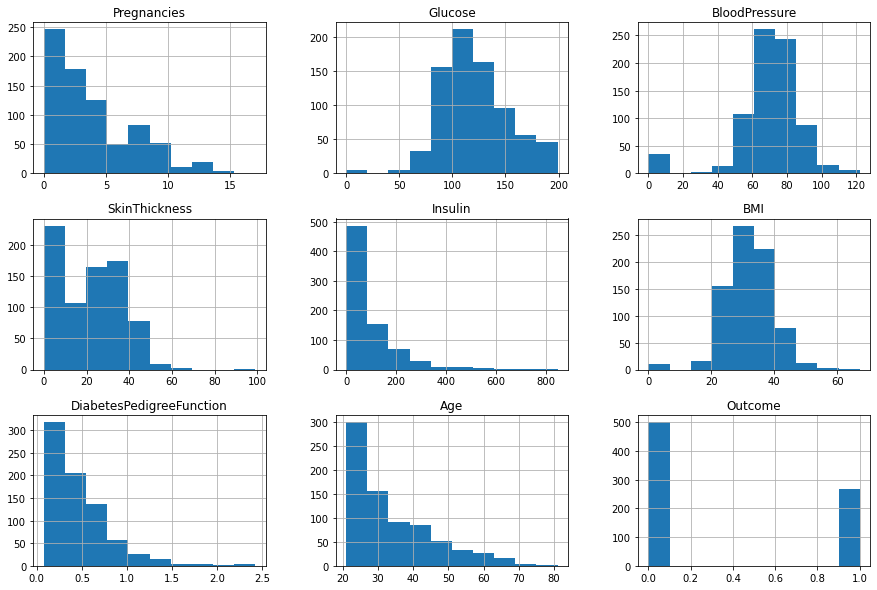

In [8]:
df.hist(figsize=(15,10))

### Correlation

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Note:

It can be observed that diabetes outcome is mostly correlated to the glucose level, BMI and Age.

### Correlation Heatmap

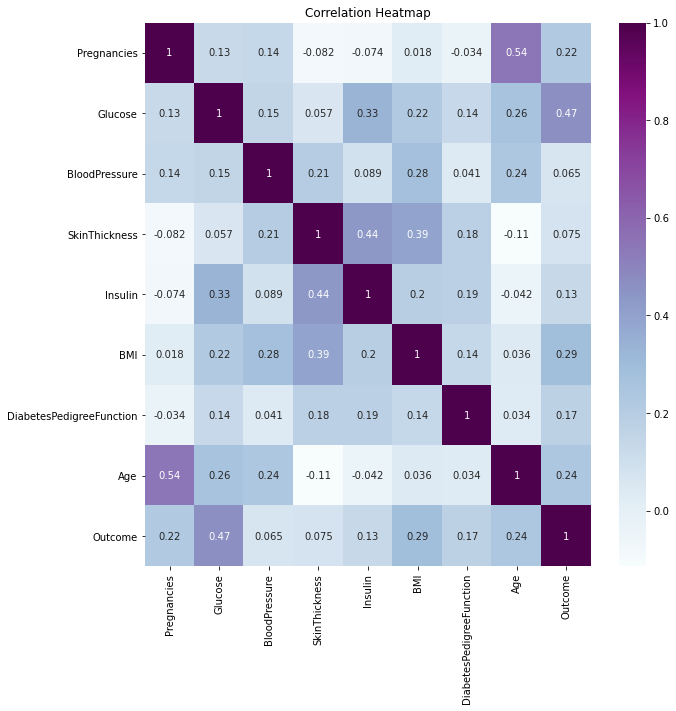

In [10]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap= "BuPu")
plt.title('Correlation Heatmap')
plt.show()

In [11]:
corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

C:\Users\joshm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


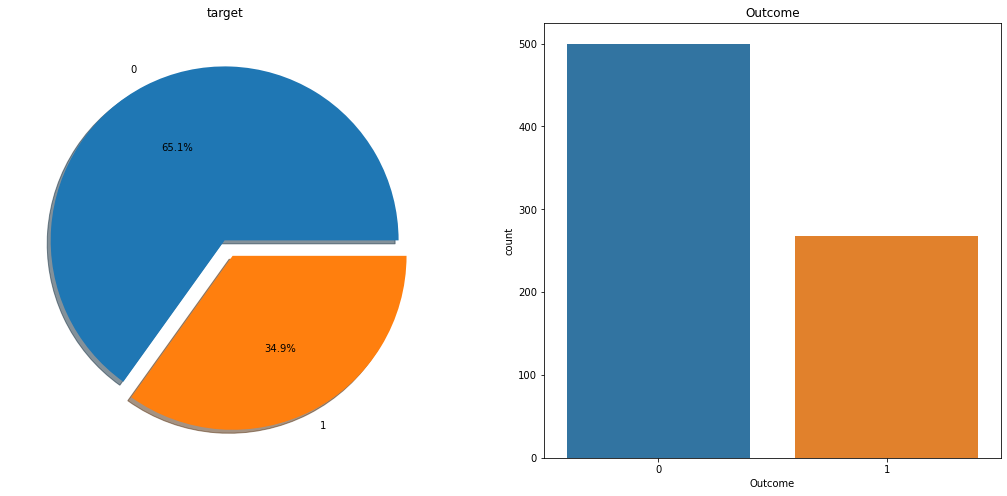

In [12]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

### Observation

It was observed on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value. 

### Replacing 0 value by NaN(null values)

In [13]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In the above dataframe, we can see that the zero values have tranformed into null values(NaN).

### Checking for the missing values again

In [15]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Observation:
Now we can see that there are some missing values in 5 columns. There are 5 missing values in the Glucose column, 35 in BloodPressure, 227 in SkinThickness, 374 in Insulin and 11 in BMI.

### Replacing NaN with mean values

In [16]:
df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

In [17]:
# Check the missing values again
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

NOTE: Now we can see that there are no missing values in the dataset.

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
